In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [214]:
path = '/content/gdrive/MyDrive/Copy of CarPrice_Assignment.csv'

In [215]:
df = pd.read_csv(path)

In [216]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [217]:
df.shape

(205, 26)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [219]:
len(df.describe().columns)

16

In [220]:
df.shape

(205, 26)

In [221]:
# dropping car id column
df.drop('car_ID', axis = 1, inplace = True)

In [222]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# The dataset consists of categorical and numerical columns.
# Let's separate them

In [223]:
categorical = df.describe(include = ['object','category']).columns

In [224]:
df[categorical].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [225]:
numerical  = df.describe().columns

In [226]:
df[numerical].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [227]:
numerical

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Let's investigate the replationship of different numericla features with the price.

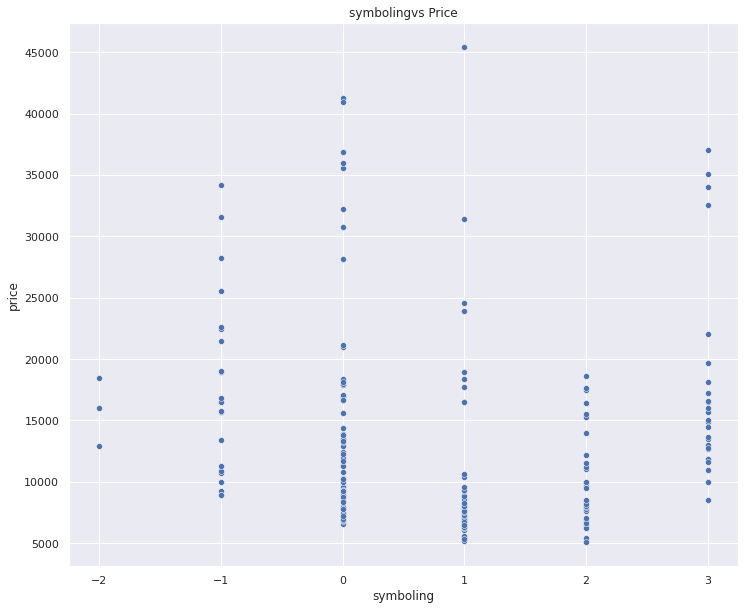

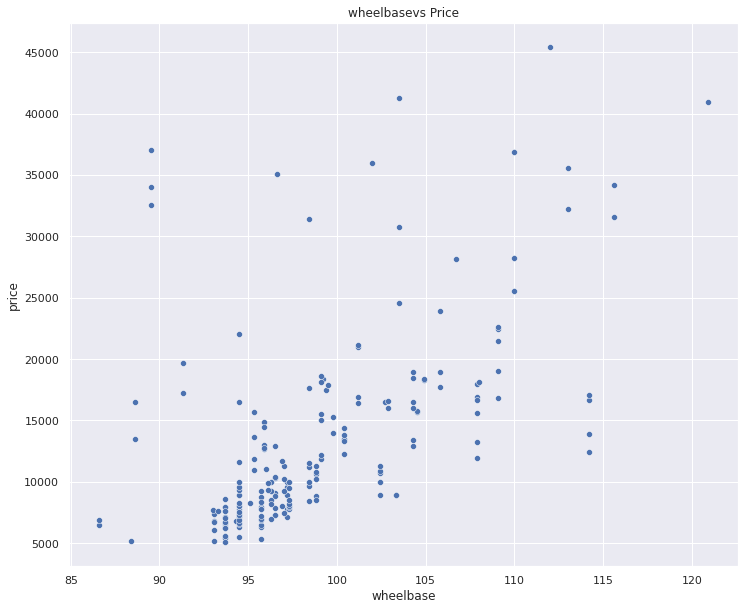

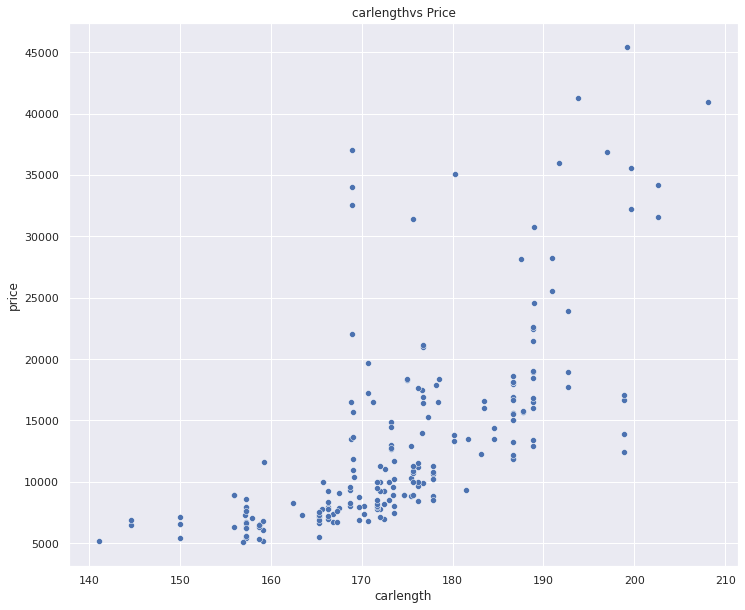

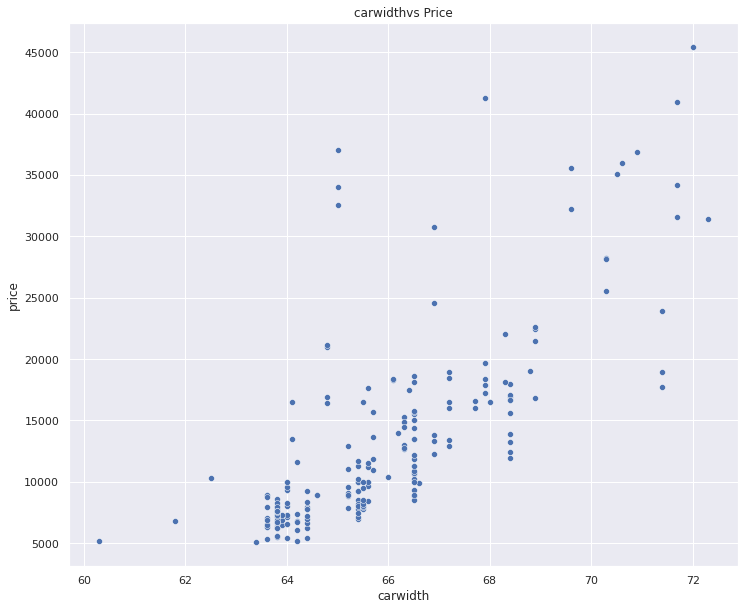

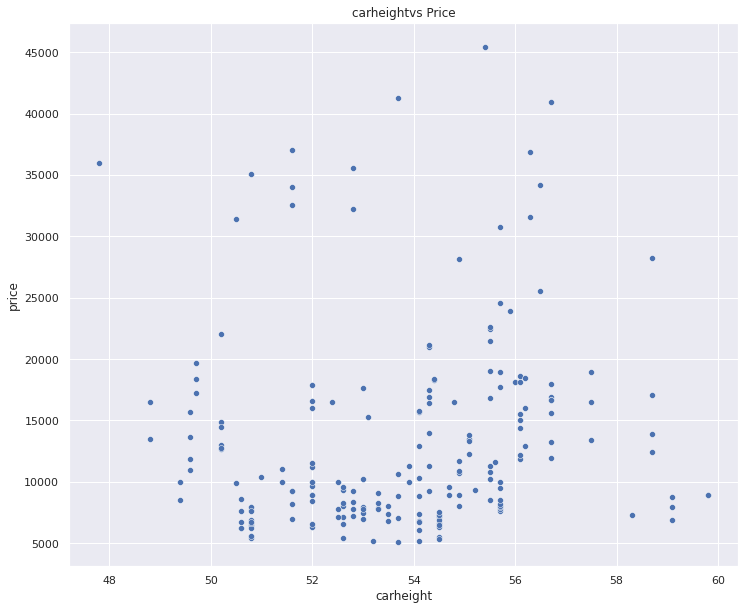

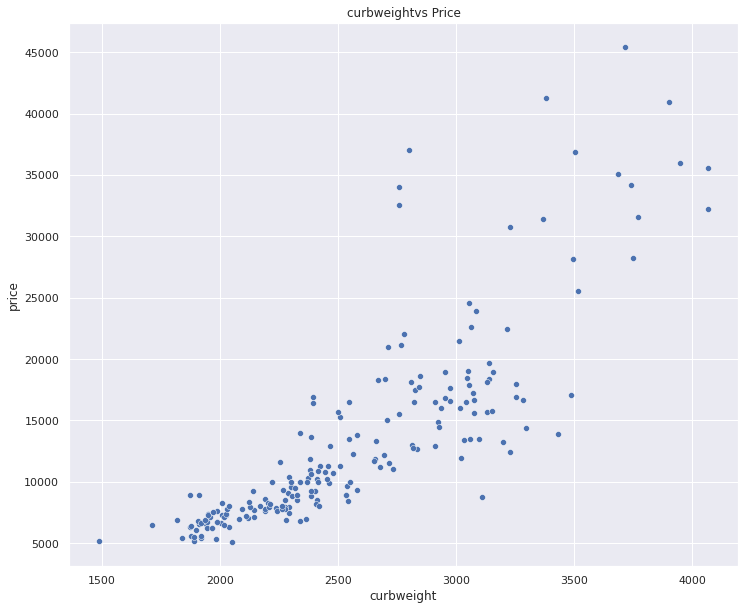

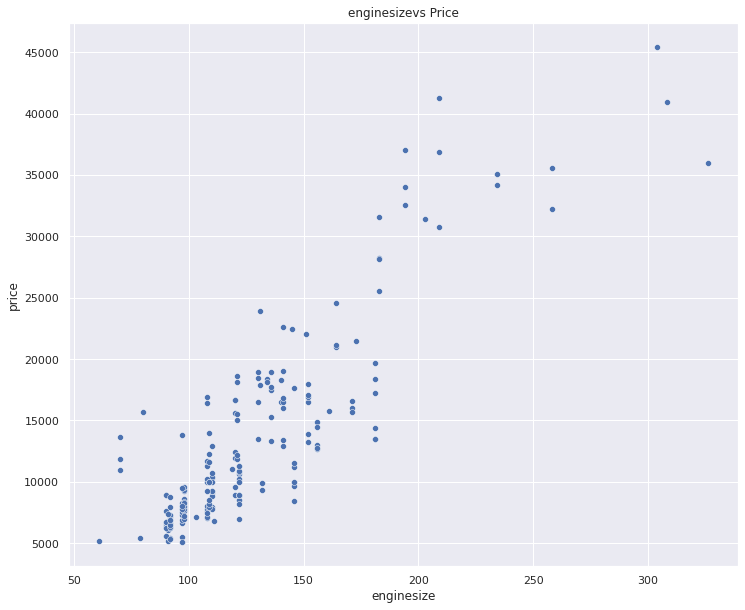

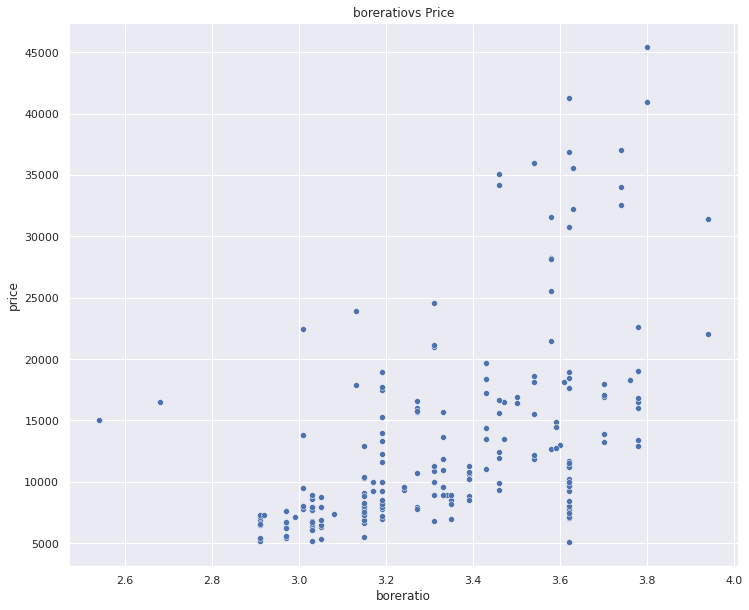

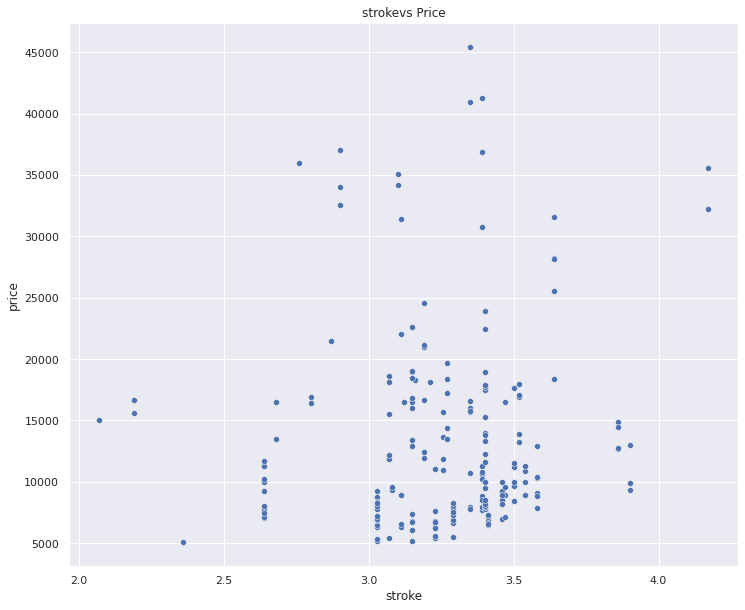

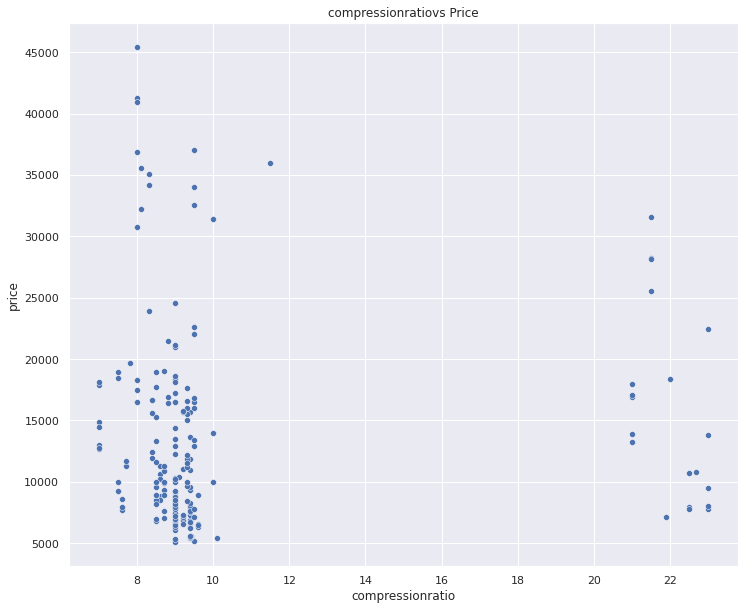

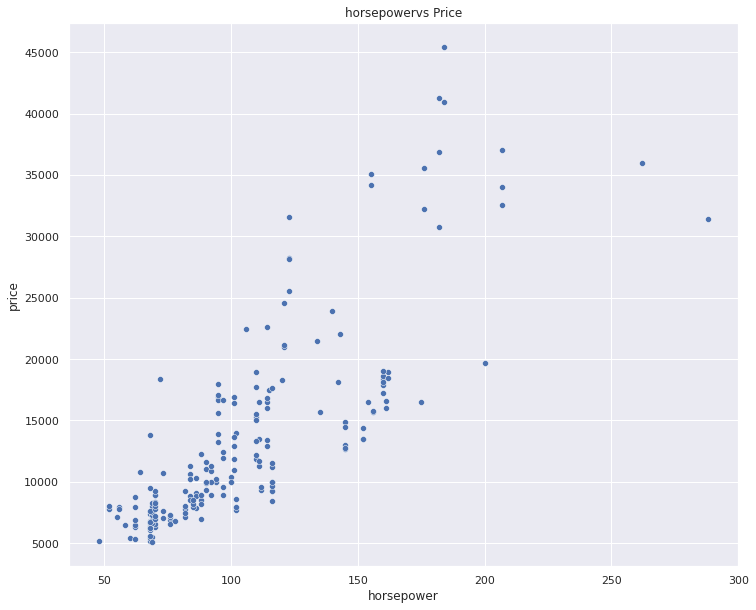

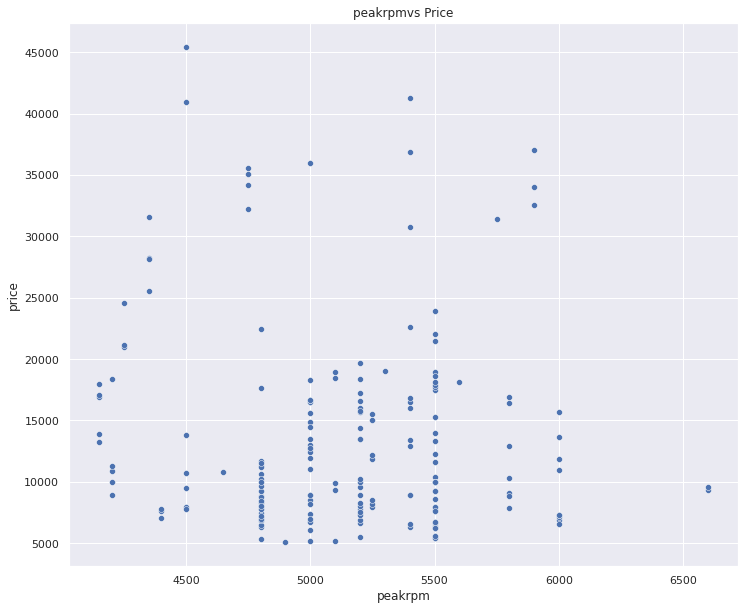

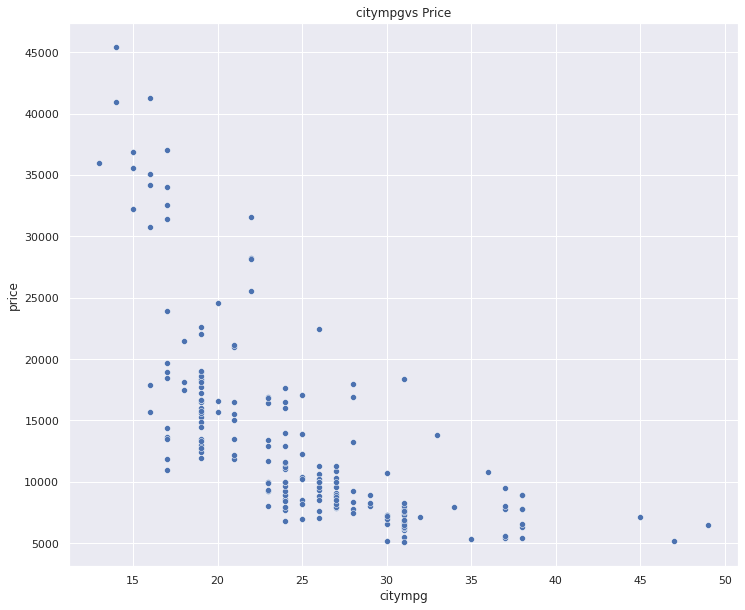

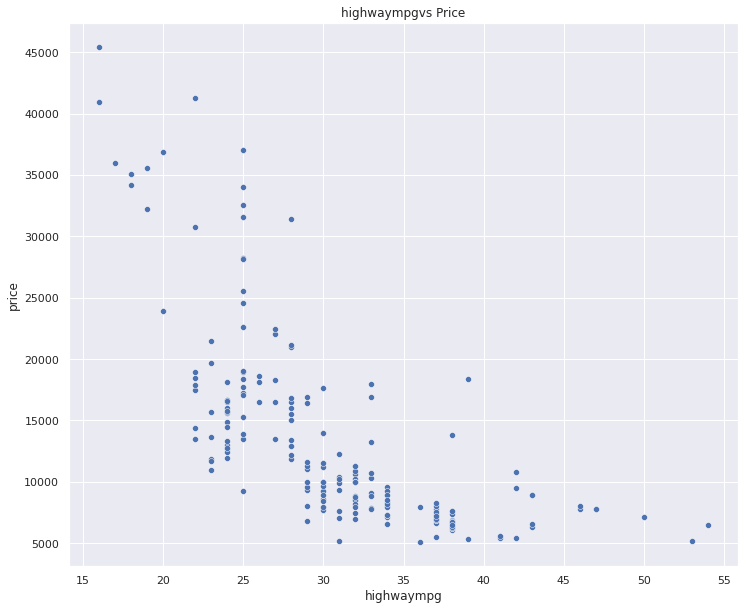

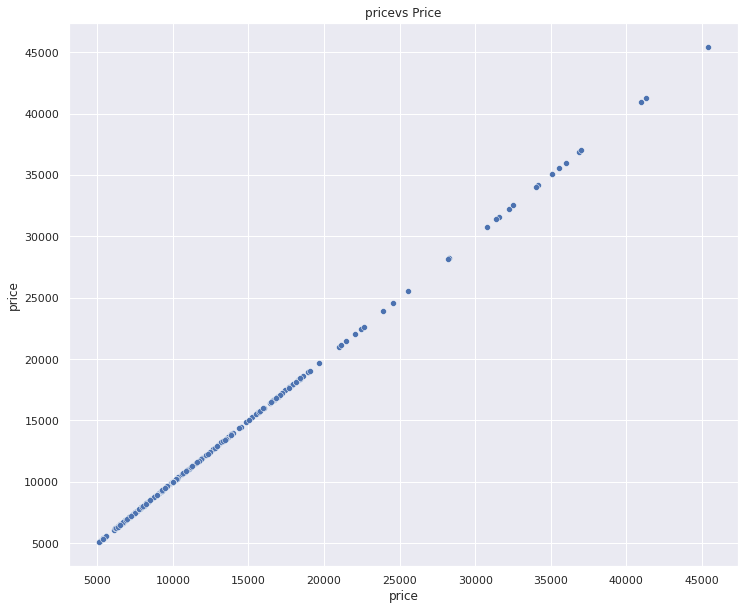

In [228]:
sns.set()
for i in numerical:
  sns.scatterplot(x = df[i], y = df.price)

  plt.title(i+ 'vs Price')
  plt.show()
  print()

## We can see that except milage, almost every feature is positively correlated with the price.

# Bar plot for each feature

In [229]:
numerical

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

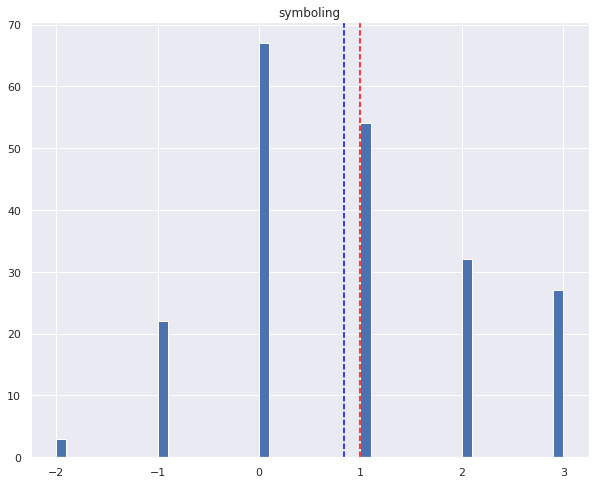

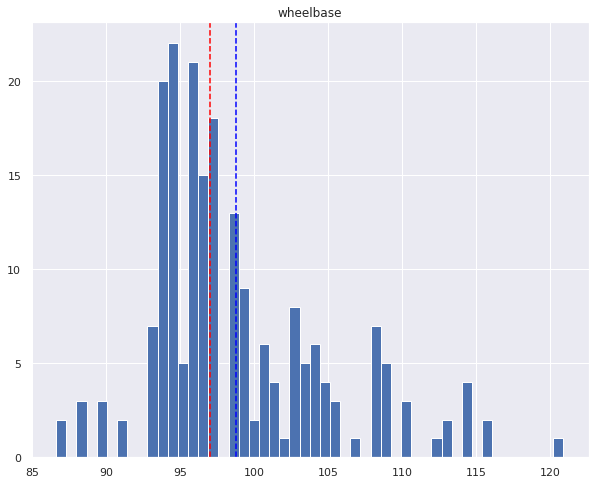

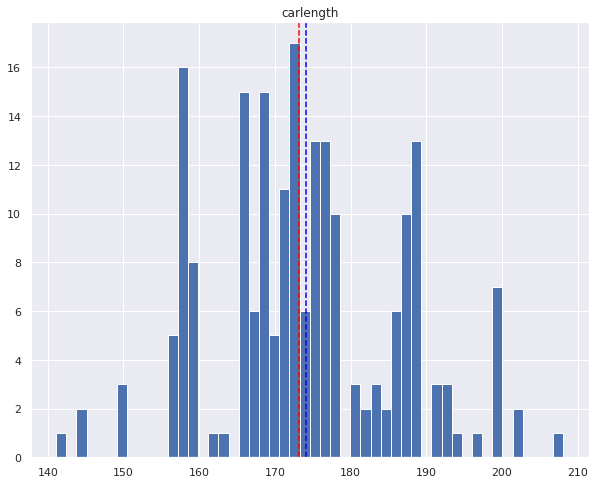

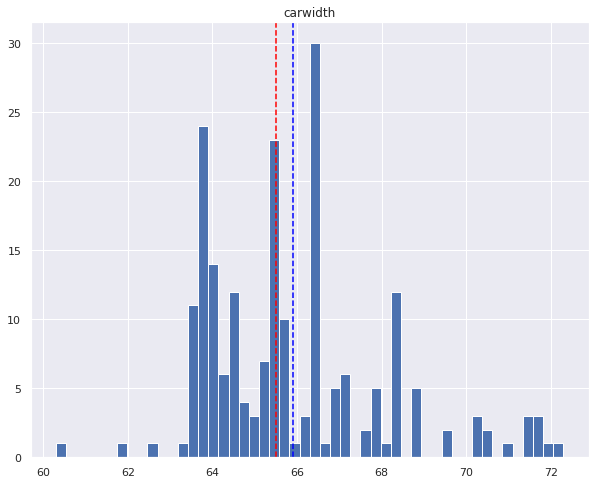

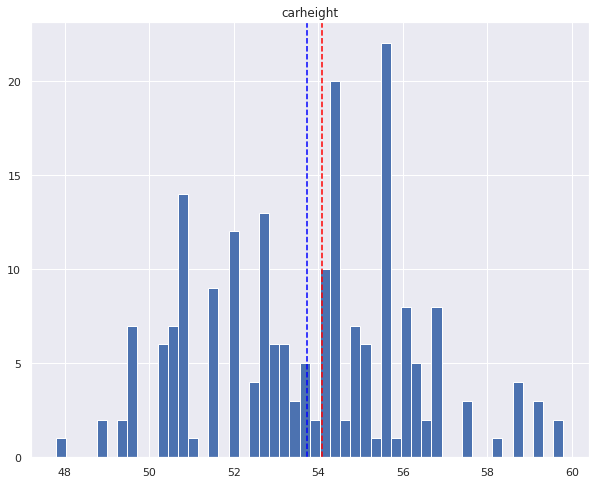

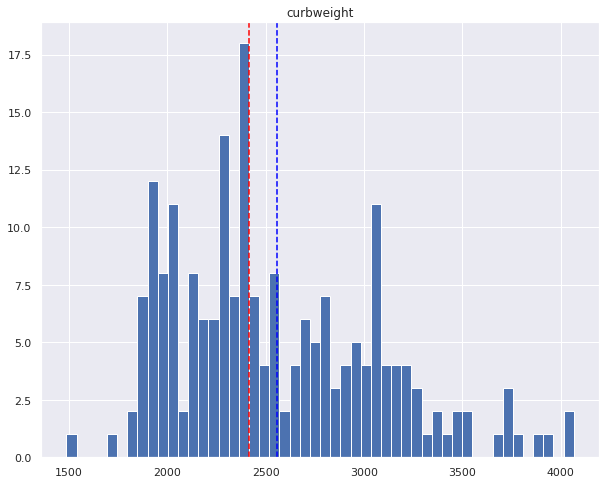

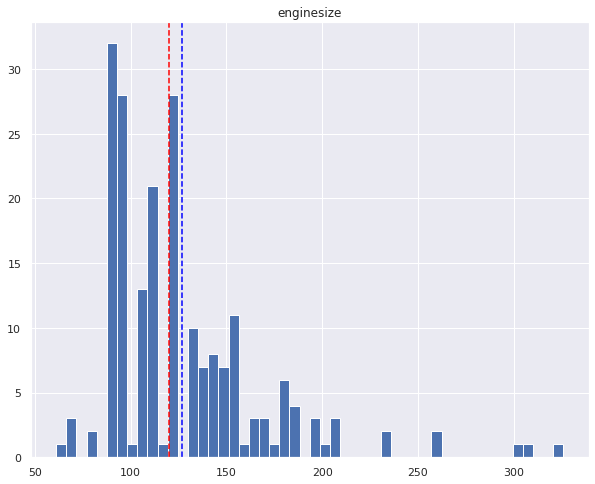

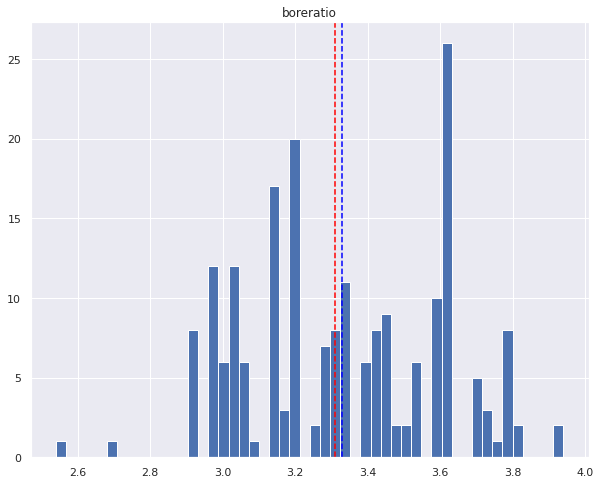

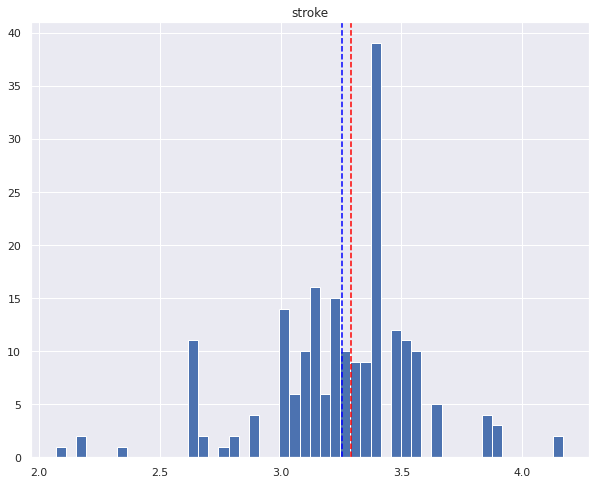

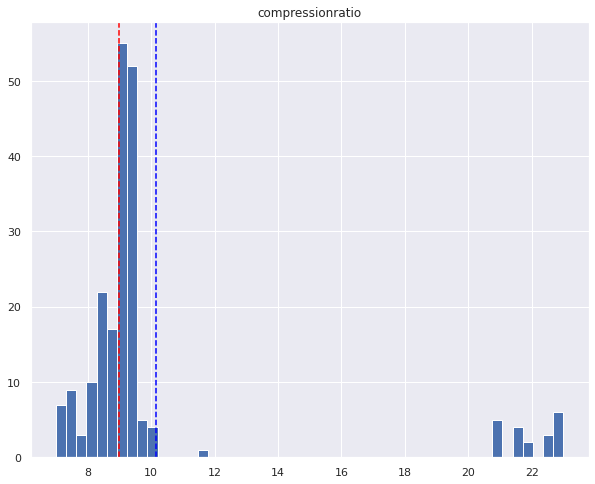

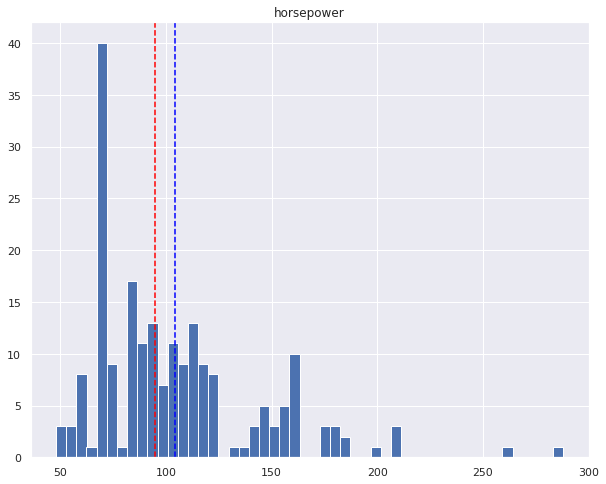

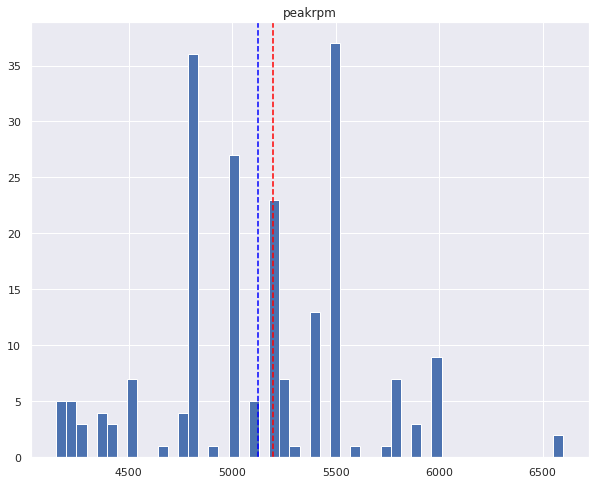

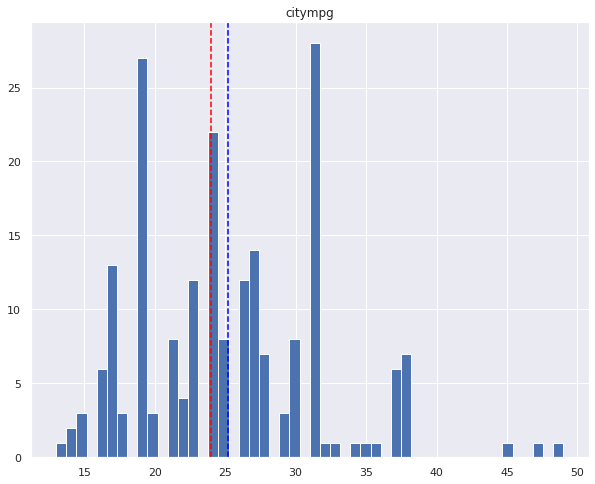

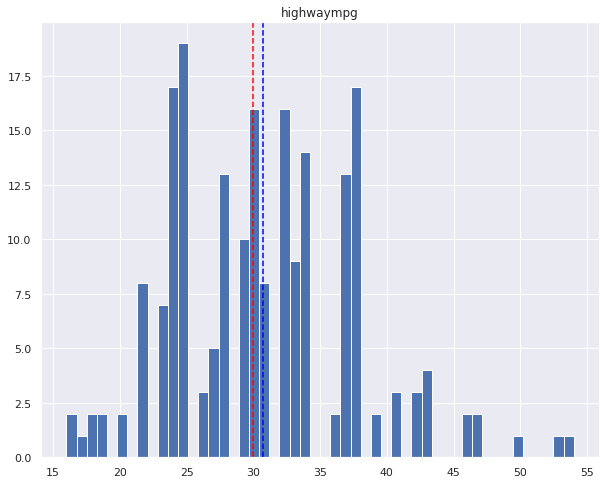

In [230]:
for col in numerical[: -1]:
  feature = df[col]

  fig = plt.figure(figsize = (10, 8))
  ax = fig.gca()
  feature.hist(bins = 50)
  ax.axvline(feature.mean(), color = 'blue', linestyle = 'dashed')
  ax.axvline(feature.median(), color = 'red', linestyle = 'dashed')
  plt.title(col)
  plt.show()
  print()

# Now let's plot correlation plot of each variable with dependent variable i.e. Price.

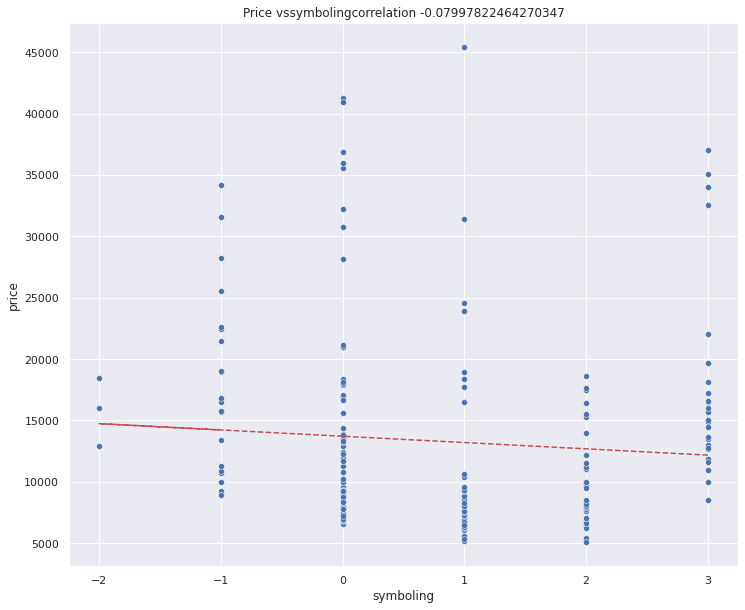

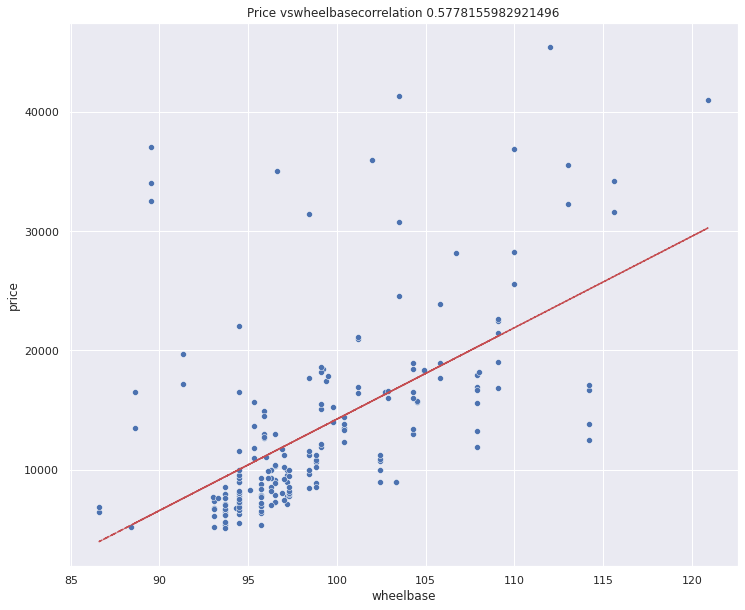

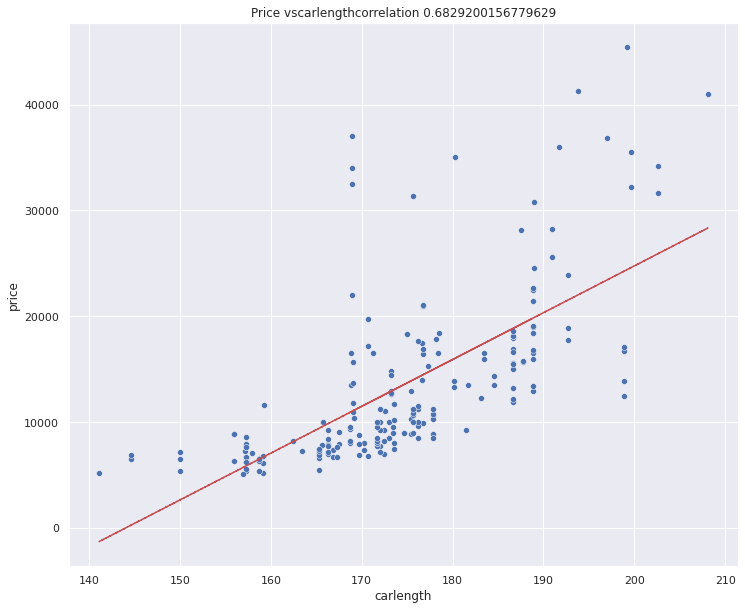

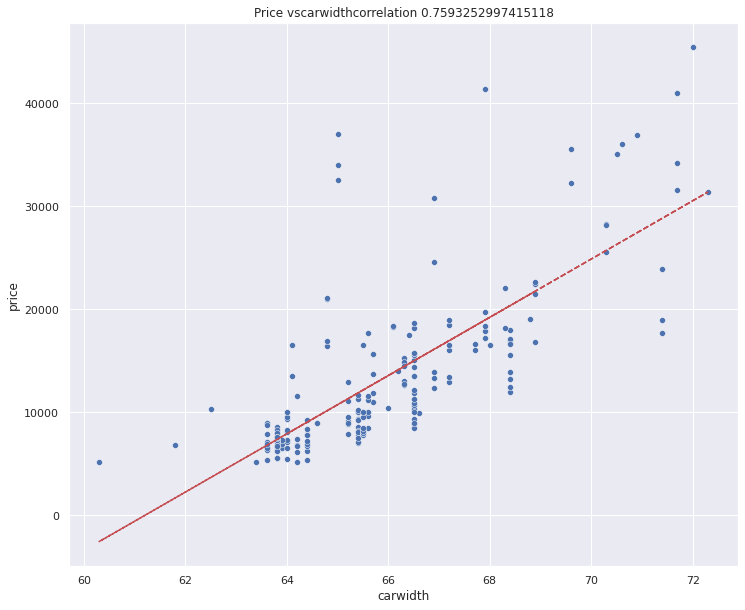

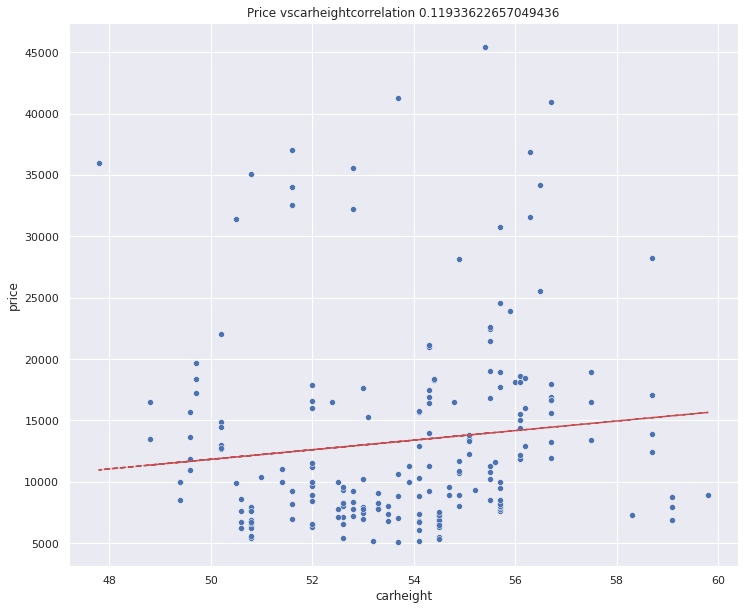

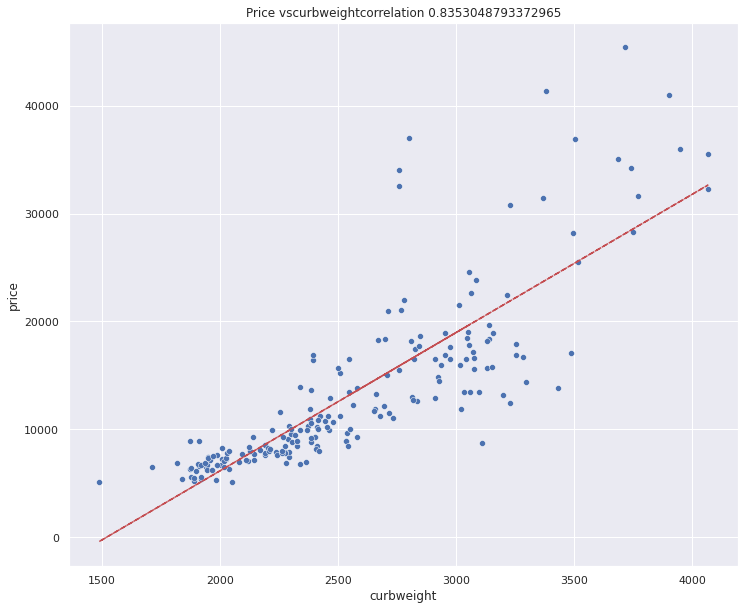

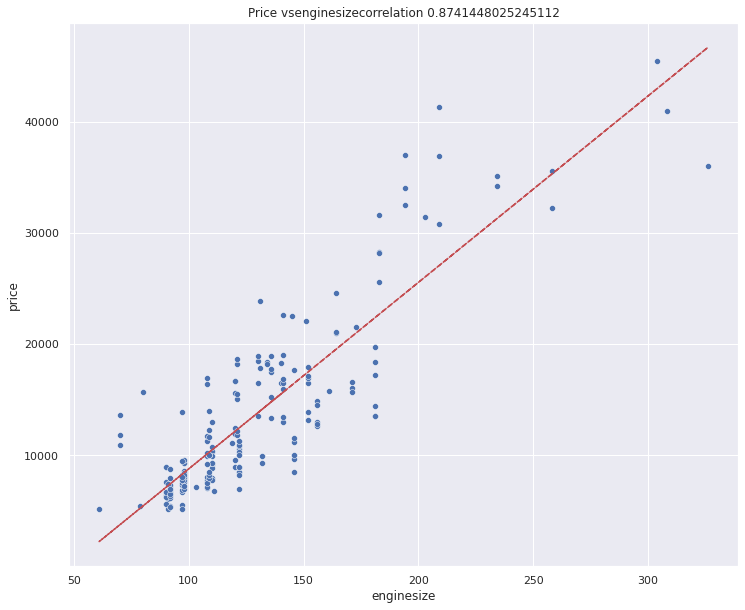

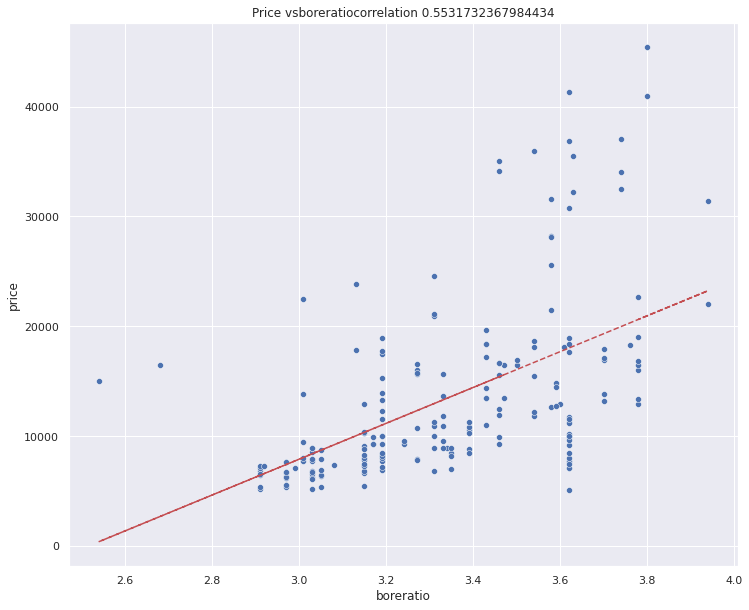

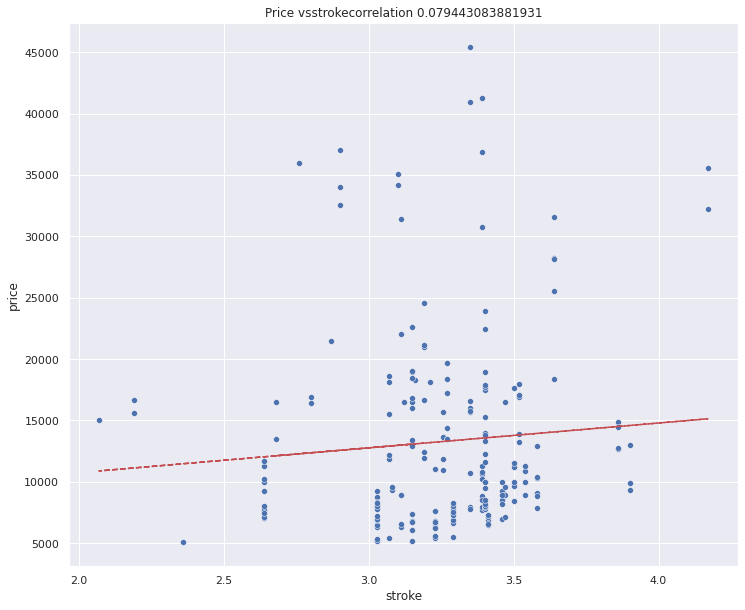

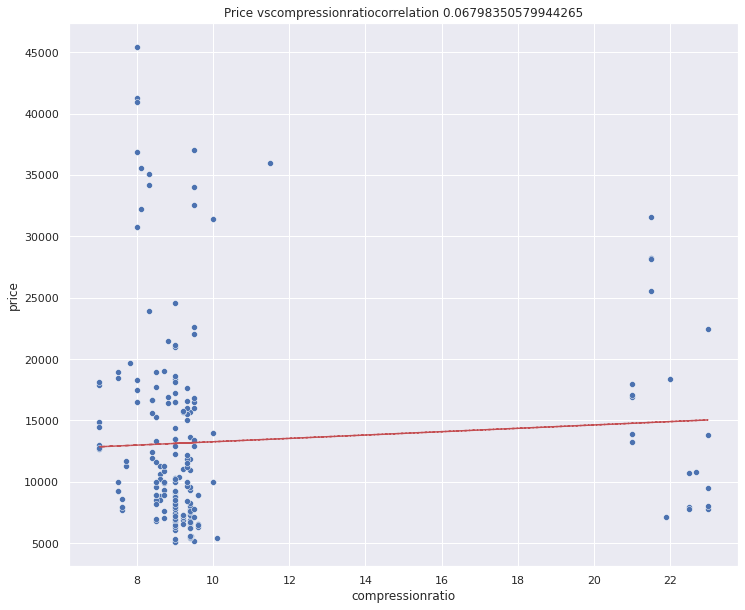

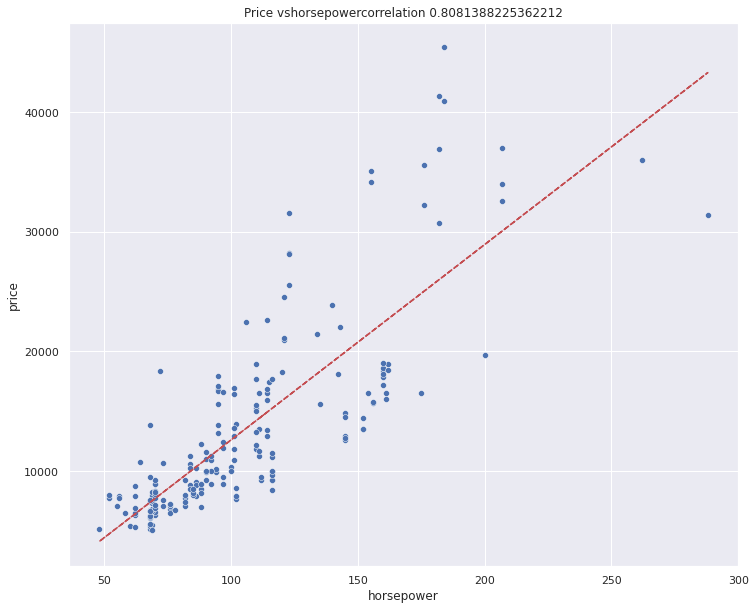

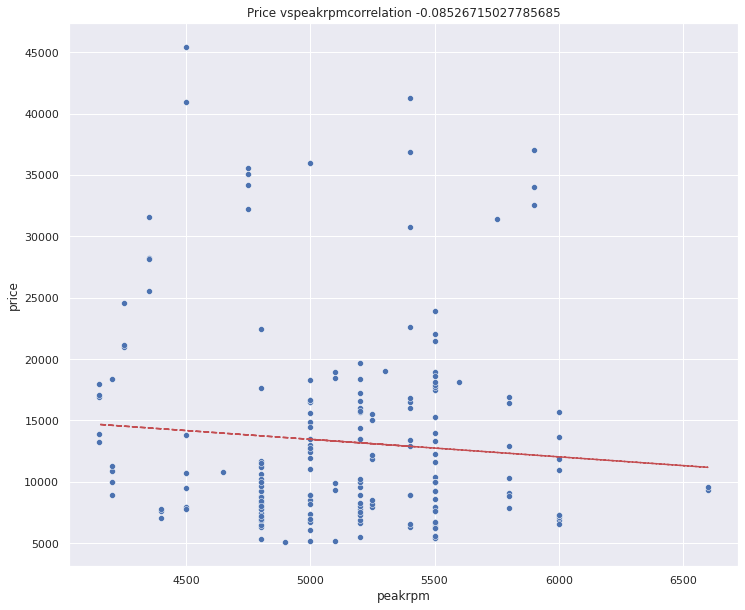

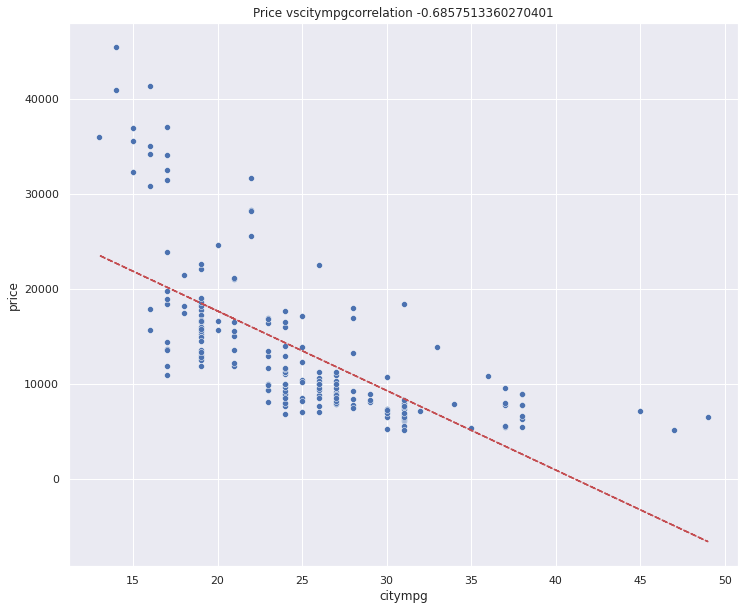

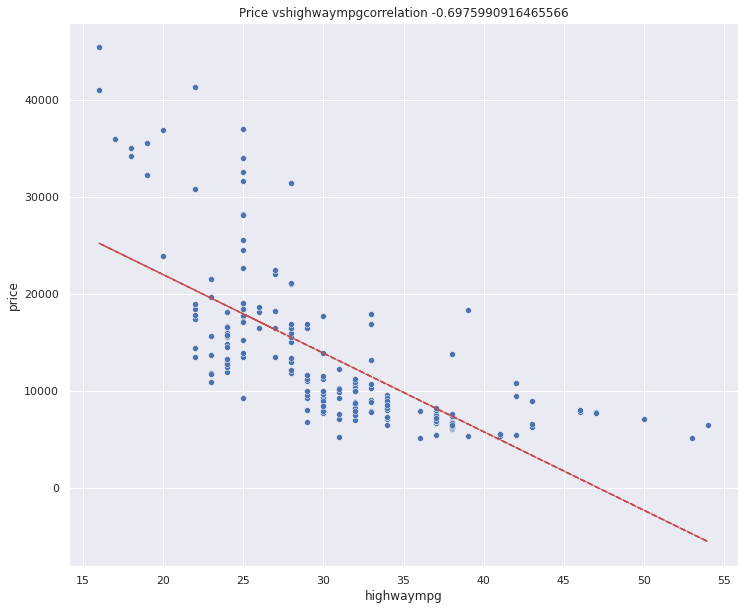

In [231]:
for col in numerical[:-1]:
  feature = df[col]

  ax = fig.gca()
  fig = plt.figure(figsize = (12, 10))

  label = df['price']

  # creating correlation of each feature with price
  correlation = feature.corr(label)

  # plotting feature vs label
  sns.scatterplot(x = feature, y = label)

  plt.xlabel(col)
  plt.ylabel('price')
  plt.title('Price vs' + col + 'correlation ' + str(correlation))


  z = np.polyfit(df[col], df['price'], 1)
  y_hat = np.poly1d(z)(df[col])

  # plotting corr line
  plt.plot(df[col], y_hat, 'r--')
  plt.show()
  print()

# Let's plot correlation plot

In [232]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


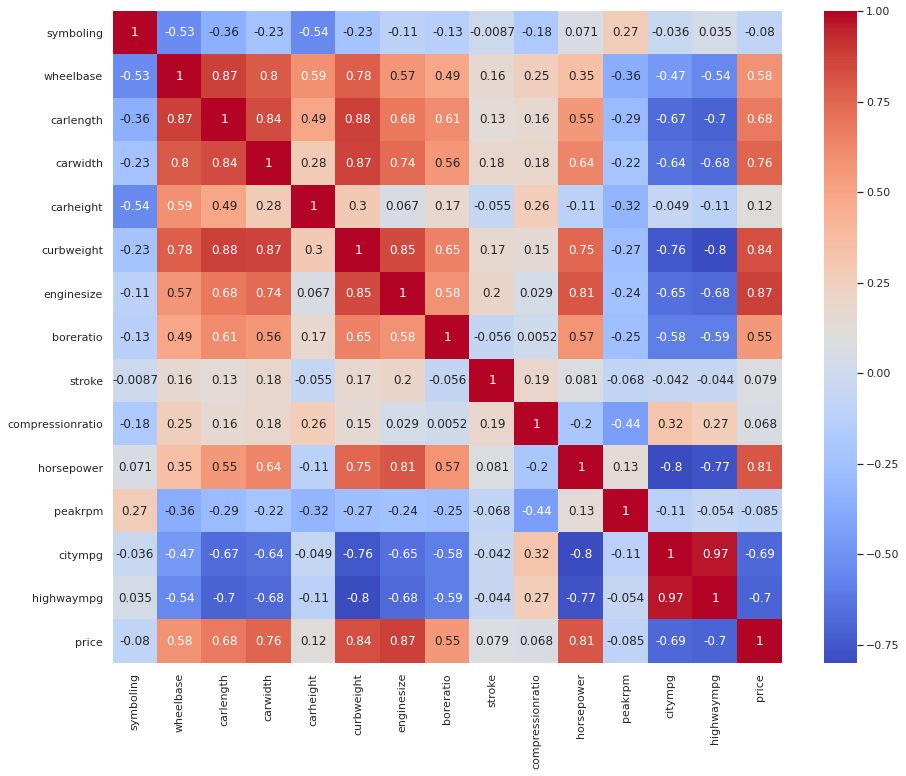

In [233]:
plt.figure(figsize = (15, 12))
corr = df.corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2g');

## we can see there are many columns having multicollinearity. Let's remove it

generally, milage is given as a single number.
Here it has given city milage and highway milage. Both, are correlated with each other.
To remove it, let's combine them in a single variable with more weightage given to city milage and less weightage to highway milage.

In [234]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [235]:
df['milage'] = 0.6 * df['citympg'] + 0.4 * df['highwaympg']

In [236]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,milage
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.4
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.4
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,21.8
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.4
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.6


In [237]:
# removing city mpg and highway mpg
df.drop(['citympg', 'highwaympg'], axis= 1, inplace = True)

In [238]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,milage
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.4
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.8
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.4
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.6


# Let's extract company name from Car name

In [239]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [240]:
df['company'] = df['CarName'].str.split(' ', expand = True)[0]

In [241]:
df.drop(['CarName'], axis= 1, inplace = True)

In [242]:
df['company'] = df['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})

df['company'] = df['company'].str.lower()

In [243]:
df['company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: company, dtype: int64

In [244]:
df['company'].nunique()

22

In [245]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,milage,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.4,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.8,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.4,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.6,audi


# Noe let's explore categorical variables

In [247]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,milage,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.4,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.8,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.4,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.6,audi


In [250]:
df[['cylindernumber', 'doornumber']].value_counts()

cylindernumber  doornumber
four            four          92
                two           67
six             four          13
                two           11
five            four           8
two             two            4
five            two            3
eight           two            3
                four           2
twelve          two            1
three           two            1
dtype: int64

In [254]:
df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}, 
                                             inplace = True)

In [256]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [257]:
df['doornumber'].replace({'four': 4, 'two': 2}, inplace = True)

In [258]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,milage,company
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.4,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.8,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.4,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.6,audi


In [259]:
categorical = df.describe(include = ['object']).columns
categorical

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'company'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


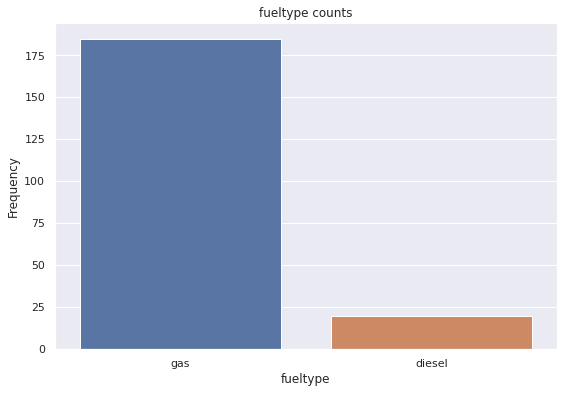

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


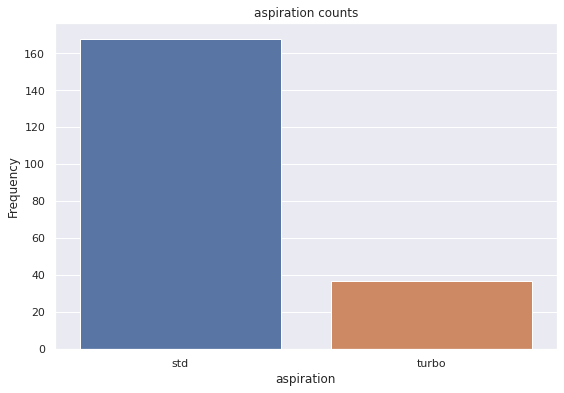

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


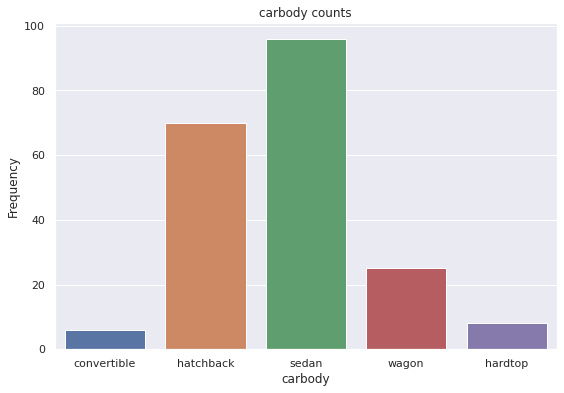

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


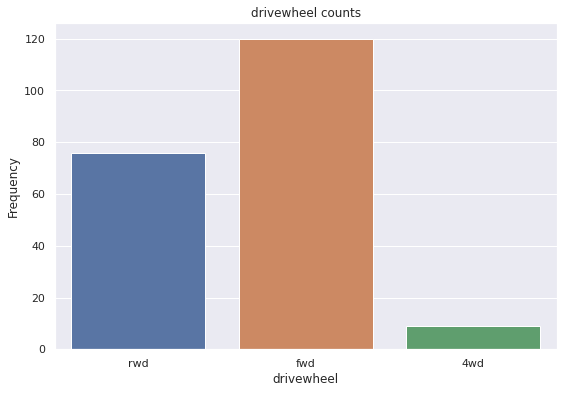

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


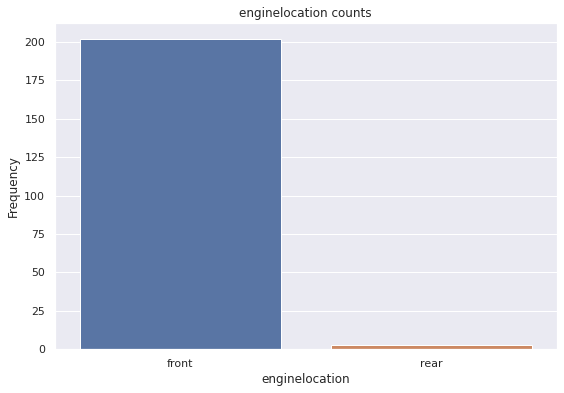

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


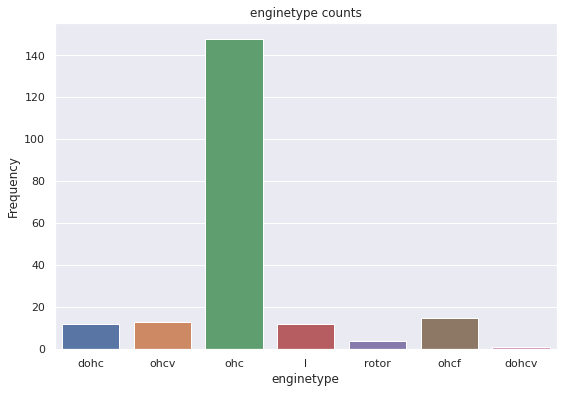

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


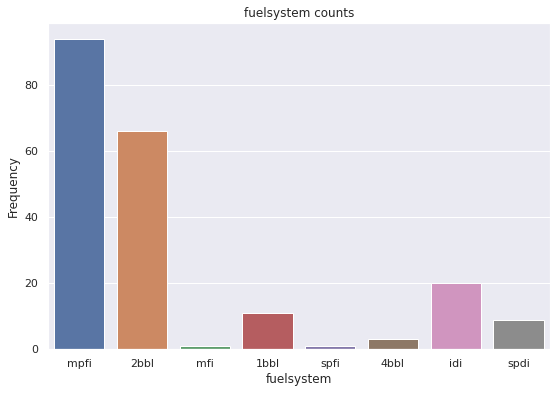

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


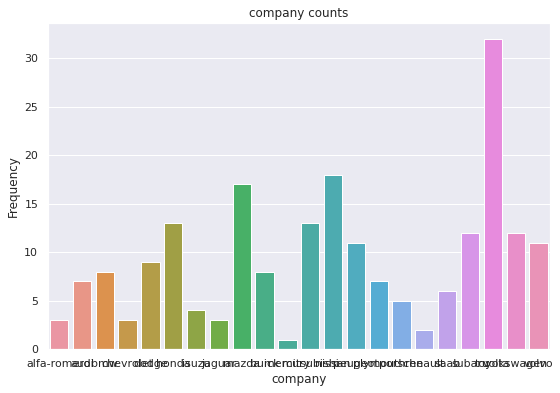

In [260]:
for col in categorical:
    counts = df[col]
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    # counts.plot.bar(ax = ax, color='steelblue')
    sns.countplot(counts)
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    plt.show()
    print()

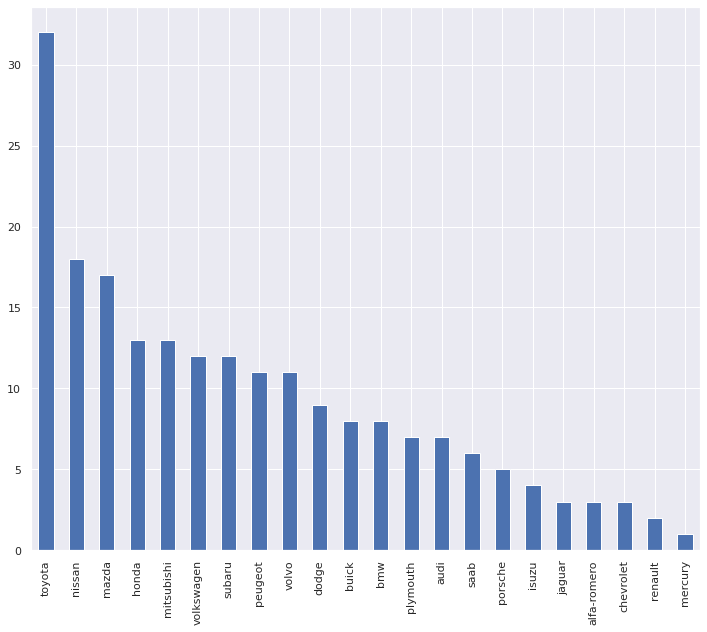

In [261]:
plt.rcParams['figure.figsize'] = 12, 10
df['company'].value_counts().plot.bar();

In [262]:
df1 = df.copy()

## Using one hot encoding

In [263]:
categorical

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'company'],
      dtype='object')

In [274]:
cat = pd.get_dummies(df[categorical], columns = categorical, drop_first=True )

In [275]:
cat

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [276]:
cat.shape

(205, 43)

In [277]:
df1.shape

(205, 24)

In [278]:
new = pd.concat([df1, cat], axis = 1)

In [279]:
new.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,milage,company,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.4,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.8,alfa-romero,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.4,audi,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.6,audi,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [281]:
new.drop(categorical, axis = 1, inplace=True)

In [282]:
new.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,milage,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,13495.0,23.4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,16500.0,23.4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,16500.0,21.8,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,13950.0,26.4,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,17450.0,19.6,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [285]:
new.shape

(205, 59)

In [286]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   doornumber           205 non-null    int64  
 2   wheelbase            205 non-null    float64
 3   carlength            205 non-null    float64
 4   carwidth             205 non-null    float64
 5   carheight            205 non-null    float64
 6   curbweight           205 non-null    int64  
 7   cylindernumber       205 non-null    int64  
 8   enginesize           205 non-null    int64  
 9   boreratio            205 non-null    float64
 10  stroke               205 non-null    float64
 11  compressionratio     205 non-null    float64
 12  horsepower           205 non-null    int64  
 13  peakrpm              205 non-null    int64  
 14  price                205 non-null    float64
 15  milage               205 non-null    flo

# Model Building

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
df_train, df_test = train_test_split(new, test_size = 0.8, random_state = 100)

In [294]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [292]:
new.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price',
       'milage', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_audi', 'company_bmw',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_porsche', 'compan

In [293]:
variables = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'milage']

In [299]:
df_train[variables] = scaler.fit_transform(df_train[variables])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [300]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,milage,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
2,0.296529,-1.467599,-0.935838,-0.420354,-0.333604,-0.651143,0.442292,0.894884,0.541784,-2.576702,0.732070,-0.352327,0.973124,-0.204729,16500.0,-0.857972,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80,2.166940,-1.467599,-0.565914,-0.251204,-0.379657,-1.961955,-0.483202,-0.415482,-0.450718,-0.617355,0.699177,-0.698407,0.163227,0.899730,9959.0,-0.160019,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
191,-0.638677,0.681385,0.276691,0.425397,0.311139,0.528588,0.111320,0.239701,0.163688,-0.537382,0.501819,-0.467687,0.035349,0.899730,13295.0,-0.997563,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
61,0.296529,-1.467599,-0.052130,0.199863,0.126927,-0.083125,-0.452557,-0.415482,-0.167146,0.262352,0.468926,-0.444615,-0.518791,-0.646513,10595.0,0.293651,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
49,-0.638677,-1.467599,0.605512,1.506079,2.015102,-2.661055,2.744791,4.825981,4.653581,0.862151,-1.603333,0.224474,3.274936,-0.204729,36000.0,-2.114288,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [301]:
y_train = df_train['price']

In [302]:
X_train = df_train.drop(['price'], axis = 1)

# Linear Regression using sklearn

In [303]:
from sklearn.linear_model import LinearRegression

In [304]:
linear = LinearRegression()

Fitting the data

In [305]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
# coefficients
linear.coef_

array([-2.66892787e+03,  6.90999720e+02, -7.95027571e+03,  5.07057140e+03,
        6.20189205e+02, -5.42226672e+03,  9.64104049e+03,  1.05213495e+04,
       -1.99680598e+04,  7.90740006e+03, -4.07923878e+03, -7.88126908e+03,
       -3.48498227e+03, -8.60410470e+03, -1.86775119e+00, -3.04128689e+03,
        6.26130153e+03,  2.69880562e+03,  3.16522618e+03,  8.56401570e+02,
       -6.72043337e+03, -4.05180619e+02,  1.56881077e+04, -1.59559477e-10,
       -6.16839065e+03, -1.36510006e+04, -3.01473317e+03, -1.63780800e+04,
       -5.95952385e+03, -6.81678601e+03, -1.05953872e+04,  5.91171556e-11,
        3.04128689e+03,  3.71073838e-10, -4.01968892e+03, -5.93466741e+03,
        8.64019967e-11,  1.37365279e+04, -1.97037092e+04, -3.54824101e+02,
        0.00000000e+00,  2.35378328e+03,  1.75084566e+04,  0.00000000e+00,
        3.83592568e+03, -4.49609491e+03,  0.00000000e+00, -6.52469939e+03,
        7.05682770e+03, -1.36510006e+04,  0.00000000e+00, -6.16839065e+03,
        2.76789948e+03, -

In [308]:
linear.intercept_

23191.74898933558

# Using Recursive Feature Ellimination

In [309]:
from sklearn.feature_selection import RFE

In [310]:
linear = LinearRegression()

rfe1 = RFE(linear, 15)
rfe1.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [311]:
rfe1.ranking_

array([24, 32, 19, 21,  1, 15,  1,  7,  6,  8, 22,  5, 18, 11, 36,  1, 23,
       29, 30, 31, 17, 33,  1, 38, 28,  1,  1,  1,  1, 14, 10, 40,  4, 37,
       12,  9, 39,  1,  1, 34, 41, 26, 20, 42,  1,  2, 43,  3, 13,  1, 44,
       27,  1, 25,  1,  1, 16, 35])

In [312]:
rfe1.support_

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False, False])

# Stats Model

In [313]:
import statsmodels.api as sm

In [315]:
col1 = X_train.columns[rfe1.support_]

In [316]:
X_train_rfe1 = X_train[col1]

In [317]:
X_train_rfe1.head()

,carwidth,curbweight,fueltype_gas,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,company_audi,company_bmw,company_jaguar,company_peugeot,company_renault,company_subaru,company_toyota
2,-0.333604,0.442292,1,1,0,0,0,1,0,0,0,0,0,0,0
80,-0.379657,-0.483202,1,0,0,1,0,0,0,0,0,0,0,0,0
191,0.311139,0.111320,1,0,0,1,0,0,0,0,0,0,0,0,0
61,0.126927,-0.452557,1,0,0,1,0,0,0,0,0,0,0,0,0
49,2.015102,2.744791,1,1,0,0,0,1,0,0,1,0,0,0,0


In [318]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [319]:
X_train_rfe1.head()

,const,carwidth,curbweight,fueltype_gas,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,company_audi,company_bmw,company_jaguar,company_peugeot,company_renault,company_subaru,company_toyota
2,1.0,-0.333604,0.442292,1,1,0,0,0,1,0,0,0,0,0,0,0
80,1.0,-0.379657,-0.483202,1,0,0,1,0,0,0,0,0,0,0,0,0
191,1.0,0.311139,0.111320,1,0,0,1,0,0,0,0,0,0,0,0,0
61,1.0,0.126927,-0.452557,1,0,0,1,0,0,0,0,0,0,0,0,0
49,1.0,2.015102,2.744791,1,1,0,0,0,1,0,0,1,0,0,0,0


In [325]:
linear1 = sm.OLS(y_train, X_train_rfe1).fit()

In [327]:
linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     74.32
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.16e-17
Time:                        08:49:13   Log-Likelihood:                -348.10
No. Observations:                  41   AIC:                             724.2
Df Residuals:                      27   BIC:                             748.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.716e+04   1770.435      9.695      0.000    1.35e+04    2.08e+04
carwidth         2883.4191    484.359      5.953      0.000    1889.596    3877.242
curbweight       1895.1458    569.100      3.330      0.003     727.449    3062.842
fueltype_gas    -1785.5359   1013.252     -1.762      0.089   -3864.558     293.486
drivewheel_rwd   2945.3378   1008.304      2.921      0.007     876.468    5014.208
enginetype_l    -5750.0308    670.996     -8.569      0.000   -7126.801   -4373.261
enginetype_ohc  -3168.0884   1111.126     -2.851      0.008   -5447.932    -888.245
enginetype_ohcf -2151.8147    661.997     -3.250      0.003   -3510.120    -793.509
enginetype_ohcv -2555.2439   1162.467     -2.198      0.037   -4940.430    -170.058
company_audi     3549.0097   1244.867      2.851      0.008     994.754    6103.265
company_bmw      6774.7925   1824.551      3.713      0.001    3031.122    1.05e+04
company_jaguar   9218.4056   1845.525      4.995      0.000    5431.702     1.3e+04
company_peugeot -5750.0308    670.996     -8.569      0.000   -7126.801   -4373.261
company_renault -3175.7097   1511.126     -2.102      0.045   -6276.284     -75.135
company_subaru  -2151.8147    661.997     -3.250      0.003   -3510.120    -793.509
company_toyota  -2591.4004    902.960     -2.870      0.008   -4444.122    -738.679
==============================================================================
Omnibus:                        2.897   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                1.805
Skew:                          -0.451   Prob(JB):                        0.406
Kurtosis:                       3.494   Cond. No.                     4.32e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.28e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

fueltype_gas has value greater than 0.025. But, before dropping it, let's check VIF

In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [333]:
vif = pd.DataFrame()

vif['features'] = X_train_rfe1.columns


vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [335]:
vif['VIF'] = round(vif['VIF'], 2)

In [338]:
vif.sort_values(by = 'VIF', ascending = False)

,features,VIF
5,enginetype_l,inf
7,enginetype_ohcf,inf
12,company_peugeot,inf
14,company_subaru,inf
0,const,61.02
2,curbweight,6.30
6,enginetype_ohc,5.40
1,carwidth,4.57
4,drivewheel_rwd,4.10
8,enginetype_ohcv,2.32


In [340]:
linear = LinearRegression()

rfe2 = RFE(linear, 10)

rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [341]:
col2 = X_train.columns[rfe2.support_]

In [342]:
X_train_rfe2 = X_train[col2]

In [343]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

lm2  = sm.OLS(y_train, X_train_rfe2).fit()

In [344]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     84.69
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.65e-19
Time:                        09:05:00   Log-Likelihood:                -355.54
No. Observations:                  41   AIC:                             731.1
Df Residuals:                      31   BIC:                             748.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.233e+04    417.922     29.491      0.000    1.15e+04    1.32e+04
carwidth         2991.6534    524.397      5.705      0.000    1922.138    4061.169
curbweight       2085.8865    589.706      3.537      0.001     883.174    3288.599
drivewheel_rwd   4494.2212    892.566      5.035      0.000    2673.822    6314.621
enginetype_l    -4703.0216    645.841     -7.282      0.000   -6020.223   -3385.820
company_audi     3165.9499   1364.487      2.320      0.027     383.060    5948.840
company_bmw      4903.5708   1758.751      2.788      0.009    1316.574    8490.568
company_jaguar   7426.8289   1918.255      3.872      0.001    3514.521    1.13e+04
company_peugeot -4703.0216    645.841     -7.282      0.000   -6020.223   -3385.820
company_renault -3292.6177   1676.207     -1.964      0.059   -6711.265     126.030
company_toyota  -1854.6339    962.416     -1.927      0.063   -3817.494     108.227
==============================================================================
Omnibus:                       11.428   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.538
Skew:                           0.816   Prob(JB):                     0.000697
Kurtosis:                       5.418   Cond. No.                     4.73e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [346]:
# checking VIF

vif = pd.DataFrame()

vif['features'] = X_train_rfe2.columns


vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [347]:
vif


,features,VIF
0,const,2.715677
1,carwidth,4.275711
2,curbweight,5.407020
3,drivewheel_rwd,2.564362
4,enginetype_l,inf
5,company_audi,1.343239
6,company_bmw,1.144428
7,company_jaguar,1.361421
8,company_peugeot,inf
9,company_renault,1.039526


In [348]:
X_train_rfe2.drop(['company_peugeot'], axis= 1, inplace = True)

In [349]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

lm2  = sm.OLS(y_train, X_train_rfe2).fit()

In [350]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     84.69
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.65e-19
Time:                        09:12:35   Log-Likelihood:                -355.54
No. Observations:                  41   AIC:                             731.1
Df Residuals:                      31   BIC:                             748.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.233e+04    417.922     

In [351]:
# checking VIF

vif = pd.DataFrame()

vif['features'] = X_train_rfe2.columns


vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]

In [352]:
vif

,features,VIF
0,const,2.715677
1,carwidth,4.275711
2,curbweight,5.407020
3,drivewheel_rwd,2.564362
4,enginetype_l,1.203721
5,company_audi,1.343239
6,company_bmw,1.144428
7,company_jaguar,1.361421
8,company_renault,1.039526
9,company_toyota,1.267965


In [354]:
df_test[variables] = scaler.transform(df_test[variables])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [355]:
y_test = df_test['price']

In [356]:
X_test = df_test.drop(['price'], axis= 1)

In [357]:
col2

Index(['carwidth', 'curbweight', 'drivewheel_rwd', 'enginetype_l',
       'company_audi', 'company_bmw', 'company_jaguar', 'company_peugeot',
       'company_renault', 'company_toyota'],
      dtype='object')

In [358]:
X_test_rfe2 = X_test[col2]

In [364]:
X_test_rfe2

,carwidth,curbweight,drivewheel_rwd,enginetype_l,company_audi,company_bmw,company_jaguar,company_renault,company_toyota
160,-0.840187,-1.047080,0,0,0,0,0,0,1
186,-0.333604,-0.677291,0,0,0,0,0,0,0
59,0.126927,-0.452557,0,0,0,0,0,0,0
165,-1.024400,-0.697721,1,0,0,0,0,0,1
140,-1.116506,-0.748797,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
27,-1.116506,-0.848905,0,0,0,0,0,0,0
63,0.126927,-0.334061,0,0,0,0,0,0,0
147,-0.379657,-0.309545,0,0,0,0,0,0,0
105,0.771670,1.087890,1,0,0,0,0,0,0


In [365]:
X_test_rfe2 = sm.add_constant(X_test_rfe2)

In [378]:
X_test_rfe2

,const,carwidth,curbweight,drivewheel_rwd,enginetype_l,company_audi,company_bmw,company_jaguar,company_renault,company_toyota
160,1.0,-0.840187,-1.047080,0,0,0,0,0,0,1
186,1.0,-0.333604,-0.677291,0,0,0,0,0,0,0
59,1.0,0.126927,-0.452557,0,0,0,0,0,0,0
165,1.0,-1.024400,-0.697721,1,0,0,0,0,0,1
140,1.0,-1.116506,-0.748797,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27,1.0,-1.116506,-0.848905,0,0,0,0,0,0,0
63,1.0,0.126927,-0.334061,0,0,0,0,0,0,0
147,1.0,-0.379657,-0.309545,0,0,0,0,0,0,0
105,1.0,0.771670,1.087890,1,0,0,0,0,0,0


In [366]:
y_pred = lm2.predict(X_test_rfe2)

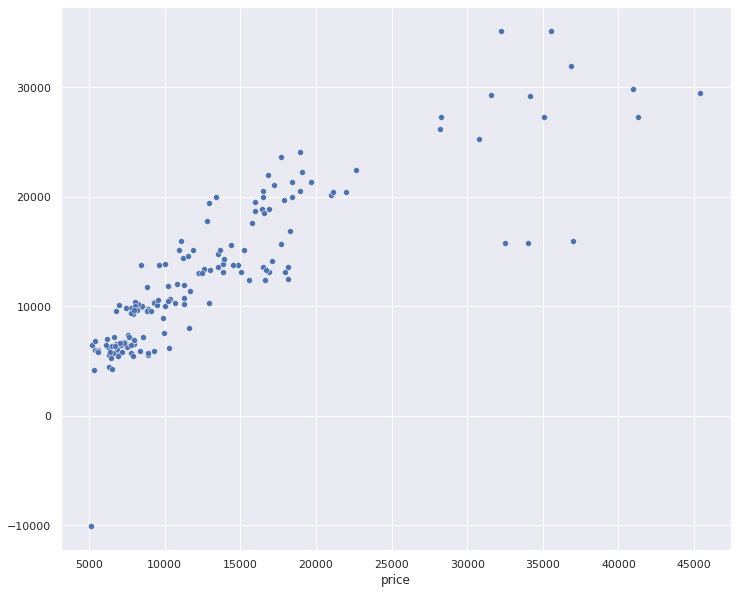

In [367]:
sns.scatterplot(x = y_test, y = y_pred)

In [369]:
from sklearn.metrics import r2_score

In [370]:
r2_score(y_test, y_pred)

0.7399158049345068